In [1]:
import pandas as pd
import datetime
import matplotlib.pyplot as plt
# DA on the Memory Usage of Broker-1
df1b = pd.read_csv("Brok1mem_usage.csv")
df1b.drop(['name'], axis=1, inplace=True)
df1b['timestamp'] = pd.to_datetime(df1b['timestamp'], unit='s')
df1b.head(3)

,timestamp,values,pod
0,2021-08-13 18:14:40,2229825536,my-cluster-metrics-kafka-0
1,2021-08-13 18:14:59,2247950336,my-cluster-metrics-kafka-0
2,2021-08-13 18:15:18,2269843456,my-cluster-metrics-kafka-0


In [2]:
#Average Memory Usage before rebalancing
membr1 = df1b[(df1b['timestamp'] >= '2021-08-13 18:14:40') & (df1b['timestamp'] <= '2021-08-13 18:30:00')]
membr1.head(3)
membr1avg = membr1['values'].mean()
print(membr1avg)
membr1.describe()

2419559147.6825395


,values
count,6.300000e+01
mean,2.419559e+09
std,8.244145e+07
min,2.229826e+09
25%,2.357002e+09
50%,2.418954e+09
75%,2.487476e+09
max,2.557321e+09


In [3]:
#Average Memory Usage During rebalancing
memdr1 = df1b[(df1b['timestamp'] >= '2021-08-13 18:31:00') & (df1b['timestamp'] <= '2021-08-16 18:43:00')]
memdr1.head(3)
memdr1avg = memdr1['values'].mean()
print(memdr1avg)
memdr1.describe()

2595007430.037736


,values
count,5.300000e+01
mean,2.595007e+09
std,4.041843e+07
min,2.495963e+09
25%,2.580050e+09
50%,2.586624e+09
75%,2.625774e+09
max,2.655769e+09


In [4]:
#T-Stats Analysis
from scipy.stats import ttest_ind
resb1mem = ttest_ind(memdr1['values'], membr1['values'])
print(resb1mem)


Ttest_indResult(statistic=14.124083851384407, pvalue=8.460940130953536e-27)


In [5]:
membr1.drop(['pod'], axis=1, inplace=True)
membr1.head(10)
membr1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 63 entries, 0 to 62
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   timestamp  63 non-null     datetime64[ns]
 1   values     63 non-null     int64         
dtypes: datetime64[ns](1), int64(1)
memory usage: 1.5 KB


C:\Users\Bhuvi\anaconda3\lib\site-packages\pandas\core\frame.py:4163: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


In [6]:
memdr1.drop(['pod'], axis=1, inplace=True)
memdr1.head(10)
memdr1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 53 entries, 67 to 119
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   timestamp  53 non-null     datetime64[ns]
 1   values     53 non-null     int64         
dtypes: datetime64[ns](1), int64(1)
memory usage: 1.2 KB


Text(0.5, 1.0, 'Broker1 Memory Usage')

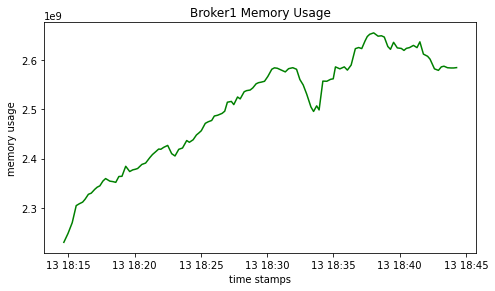

In [7]:
from datetime import datetime
#Memory Usage for the entire load test
m1=[]
for dat in df1b.timestamp:
    # print (dat)
    m1.append(datetime.strptime(str(dat), "%Y-%m-%d %H:%M:%S"))
fig1 = plt.figure(figsize=(10,4))
axe1 = fig1.add_axes([0.2, 0.1, 0.6, 0.8])
axe1.plot(m1,df1b['values'], 'g')
axe1.set_xlabel('time stamps')
axe1.set_ylabel('memory usage')
axe1.set_title('Broker1 Memory Usage')
#fig1.tight_layout()

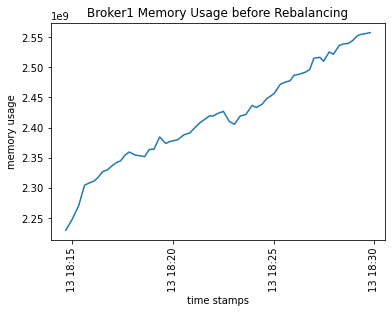

In [8]:
#Memory Usage before rebalancing
b=[]
for dat in membr1.timestamp:
    # print (dat)
    b.append(datetime.strptime(str(dat), "%Y-%m-%d %H:%M:%S"))
plt.plot(b,membr1['values'])
plt.xticks(rotation=90)
plt.xlabel('time stamps')
plt.ylabel('memory usage')
plt.title('Broker1 Memory Usage before Rebalancing')
plt.show()

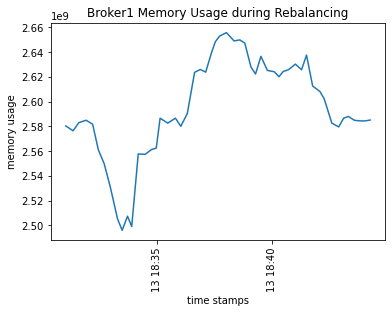

In [9]:
#Memory Usage during rebalancing
d=[]
for dat in memdr1.timestamp:
    # print (dat)
    d.append(datetime.strptime(str(dat), "%Y-%m-%d %H:%M:%S"))
plt.plot(d,memdr1['values'])
plt.xticks(rotation=90)
plt.xlabel('time stamps')
plt.ylabel('memory usage')
plt.title('Broker1 Memory Usage during Rebalancing')
plt.show()

In [10]:
# DA on the Memory Usage of Broker-2
df2b = pd.read_csv("Brok2mem_usage.csv")
df2b.drop(['name'], axis=1, inplace=True)
df2b['timestamp'] = pd.to_datetime(df2b['timestamp'], unit='s')
df2b.head(3)

,timestamp,values,pod
0,2021-08-13 18:15:00,2201370624,my-cluster-metrics-kafka-1
1,2021-08-13 18:15:11,2203717632,my-cluster-metrics-kafka-1
2,2021-08-13 18:15:29,2208690176,my-cluster-metrics-kafka-1


In [11]:
#Average Memory Usage before rebalancing
membr2 = df2b[(df2b['timestamp'] >= '2021-08-13 18:14:40') & (df2b['timestamp'] <= '2021-08-13 18:30:00')]
membr2.head(3)
membr2avg = membr2['values'].mean()
print(membr2avg)
membr2.describe()

2324267996.6896553


,values
count,5.800000e+01
mean,2.324268e+09
std,8.345703e+07
min,2.201371e+09
25%,2.252060e+09
50%,2.322502e+09
75%,2.390317e+09
max,2.472788e+09


In [12]:
#Average Memory Usage During rebalancing
memdr2 = df2b[(df2b['timestamp'] >= '2021-08-13 18:31:00') & (df2b['timestamp'] <= '2021-08-16 18:43:00')]
memdr2.head(3)
memdr2avg = memdr2['values'].mean()
print(memdr2avg)
memdr2.describe()

2568198970.385965


,values
count,5.700000e+01
mean,2.568199e+09
std,6.223526e+07
min,2.489889e+09
25%,2.531238e+09
50%,2.555818e+09
75%,2.571903e+09
max,2.717135e+09


In [13]:
#T-Stats Analysis
resb2mem = ttest_ind(memdr2['values'], membr2['values'])
print(resb1mem)

Ttest_indResult(statistic=14.124083851384407, pvalue=8.460940130953536e-27)


In [14]:
membr2.drop(['pod'], axis=1, inplace=True)
membr2.head(10)
membr2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 58 entries, 0 to 57
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   timestamp  58 non-null     datetime64[ns]
 1   values     58 non-null     int64         
dtypes: datetime64[ns](1), int64(1)
memory usage: 1.4 KB


C:\Users\Bhuvi\anaconda3\lib\site-packages\pandas\core\frame.py:4163: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


In [15]:
memdr2.drop(['pod'], axis=1, inplace=True)
memdr2.head(10)
memdr2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 57 entries, 61 to 117
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   timestamp  57 non-null     datetime64[ns]
 1   values     57 non-null     int64         
dtypes: datetime64[ns](1), int64(1)
memory usage: 1.3 KB


Text(0.5, 1.0, 'Broker2 Memory Usage')

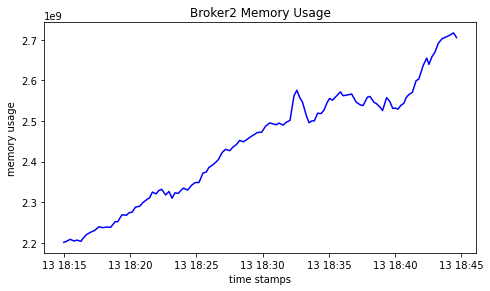

In [16]:
from datetime import datetime
#Memory Usage for the entire load test
m2=[]
for dat in df2b.timestamp:
    # print (dat)
    m2.append(datetime.strptime(str(dat), "%Y-%m-%d %H:%M:%S"))
fig2 = plt.figure(figsize=(10,4))
axe2 = fig2.add_axes([0.2, 0.1, 0.6, 0.8])
axe2.plot(m2,df2b['values'], 'b')
axe2.set_xlabel('time stamps')
axe2.set_ylabel('memory usage')
axe2.set_title('Broker2 Memory Usage')
#fig1.tight_layout()

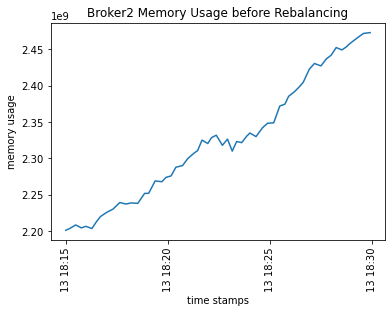

In [17]:
#Memory Usage before rebalancing
b2=[]
for dat in membr2.timestamp:
    # print (dat)
    b2.append(datetime.strptime(str(dat), "%Y-%m-%d %H:%M:%S"))
plt.plot(b2,membr2['values'])
plt.xticks(rotation=90)
plt.xlabel('time stamps')
plt.ylabel('memory usage')
plt.title('Broker2 Memory Usage before Rebalancing')
plt.show()

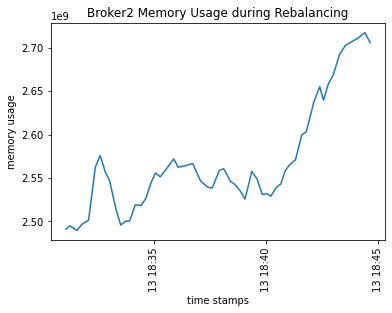

In [18]:
#Memory Usage during rebalancing
d2=[]
for dat in memdr2.timestamp:
    # print (dat)
    d2.append(datetime.strptime(str(dat), "%Y-%m-%d %H:%M:%S"))
plt.plot(d2,memdr2['values'])
plt.xticks(rotation=90)
plt.xlabel('time stamps')
plt.ylabel('memory usage')
plt.title('Broker2 Memory Usage during Rebalancing')
plt.show()

In [19]:
# DA on the Memory Usage of Broker-3
df3b = pd.read_csv("Brok3mem_usage.csv")
df3b.drop(['name'], axis=1, inplace=True)
df3b['timestamp'] = pd.to_datetime(df3b['timestamp'], unit='s')
df3b.head(3)

,timestamp,values,pod
0,2021-08-13 18:15:30,2256572416,my-cluster-metrics-kafka-2
1,2021-08-13 18:15:48,2255560704,my-cluster-metrics-kafka-2
2,2021-08-13 18:15:59,2269741056,my-cluster-metrics-kafka-2


In [20]:
#Average Memory Usage before rebalancing
membr3 = df3b[(df3b['timestamp'] >= '2021-08-13 18:14:40') & (df3b['timestamp'] <= '2021-08-13 18:30:00')]
membr3.head(3)
membr3avg = membr3['values'].mean()
print(membr3avg)
membr3.describe()

2441670586.576271


,values
count,5.900000e+01
mean,2.441671e+09
std,8.942064e+07
min,2.255561e+09
25%,2.410322e+09
50%,2.439303e+09
75%,2.505341e+09
max,2.590953e+09


In [21]:
#Average Memory Usage During rebalancing
memdr3 = df3b[(df3b['timestamp'] >= '2021-08-13 18:31:00') & (df3b['timestamp'] <= '2021-08-16 18:43:00')]
memdr3.head(3)
memdr3avg = memdr3['values'].mean()
print(memdr3avg)
memdr3.describe()

2665216633.018182


,values
count,5.500000e+01
mean,2.665217e+09
std,2.629669e+07
min,2.607722e+09
25%,2.643536e+09
50%,2.674237e+09
75%,2.684125e+09
max,2.706977e+09


In [22]:
#T-Stats Analysis
resb3mem = ttest_ind(memdr3['values'], membr3['values'])
print(resb3mem)


Ttest_indResult(statistic=17.830486200485513, pvalue=1.685432747632737e-34)


In [23]:
membr3.drop(['pod'], axis=1, inplace=True)
membr3.head(10)
membr3.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 59 entries, 0 to 58
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   timestamp  59 non-null     datetime64[ns]
 1   values     59 non-null     int64         
dtypes: datetime64[ns](1), int64(1)
memory usage: 1.4 KB


C:\Users\Bhuvi\anaconda3\lib\site-packages\pandas\core\frame.py:4163: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


In [24]:
memdr3.drop(['pod'], axis=1, inplace=True)
memdr3.head(10)
memdr3.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 55 entries, 63 to 117
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   timestamp  55 non-null     datetime64[ns]
 1   values     55 non-null     int64         
dtypes: datetime64[ns](1), int64(1)
memory usage: 1.3 KB


Text(0.5, 1.0, 'Broker3 Memory Usage')

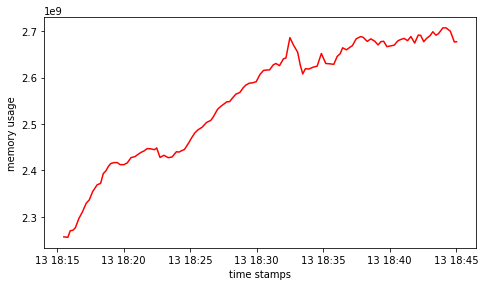

In [25]:
from datetime import datetime
#Memory Usage for the entire load test
m3=[]
for dat in df3b.timestamp:
    # print (dat)
    m3.append(datetime.strptime(str(dat), "%Y-%m-%d %H:%M:%S"))
fig3 = plt.figure(figsize=(10,4))
axe3 = fig3.add_axes([0.2, 0.1, 0.6, 0.8])
axe3.plot(m3,df3b['values'], 'r')
axe3.set_xlabel('time stamps')
axe3.set_ylabel('memory usage')
axe2.set_title('Broker3 Memory Usage')
#fig1.tight_layout()

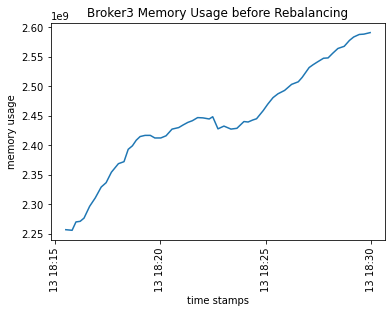

In [26]:
#Memory Usage before rebalancing
b3=[]
for dat in membr3.timestamp:
    # print (dat)
    b3.append(datetime.strptime(str(dat), "%Y-%m-%d %H:%M:%S"))
plt.plot(b3,membr3['values'])
plt.xticks(rotation=90)
plt.xlabel('time stamps')
plt.ylabel('memory usage')
plt.title('Broker3 Memory Usage before Rebalancing')
plt.show()

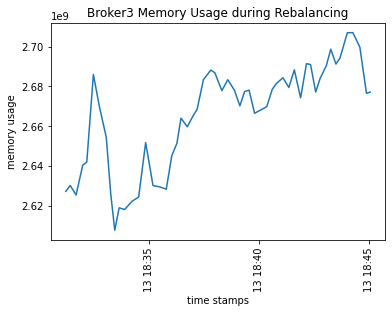

In [27]:
#Memory Usage during rebalancing
d3=[]
for dat in memdr3.timestamp:
    # print (dat)
    d3.append(datetime.strptime(str(dat), "%Y-%m-%d %H:%M:%S"))
plt.plot(d3,memdr3['values'])
plt.xticks(rotation=90)
plt.xlabel('time stamps')
plt.ylabel('memory usage')
plt.title('Broker3 Memory Usage during Rebalancing')
plt.show()

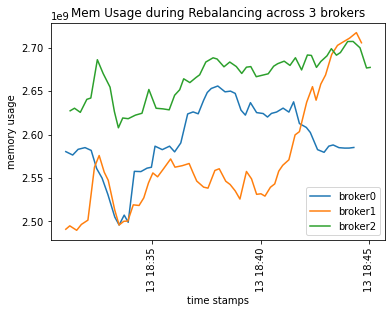

In [28]:
plt.plot(d,memdr1['values'])
plt.plot(d2,memdr2['values'])
plt.plot(d3,memdr3['values'])
plt.xticks(rotation=90)
plt.xlabel('time stamps')
plt.ylabel('memory usage')
plt.title('Mem Usage during Rebalancing across 3 brokers')
plt.legend(['broker0', 'broker1', 'broker2'], loc='best')
plt.show()

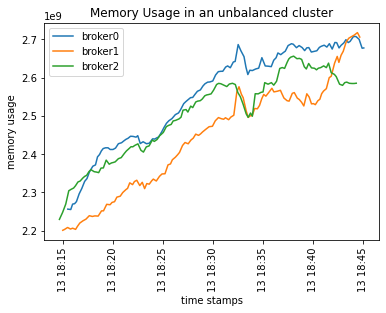

In [34]:
plt.plot(m3,df3b['values'])
plt.plot(m2,df2b['values'])
plt.plot(m1,df1b['values'])
plt.xticks(rotation=90)
plt.xlabel('time stamps')
plt.ylabel('memory usage')
plt.title('Memory Usage in an unbalanced cluster')
plt.legend(['broker0', 'broker1', 'broker2'], loc='best')
plt.show()